## This notebook takes fwd and rev reads from each sample (i.e., already demultiplexed) and combines them into a single sequence file with quality scores

With thanks to Dan Buckley's lab's protocols:  https://github.com/buckleylab/Buckley_Lab_SIP_project_protocols/blob/master/sequence_analysys_walkthrough/detailed_walkthroughs/qc.md

I did most of this with the demultiplexed files, where we might have actually just wanted them to be all one file, as we go for at the end. Anyway.

Get ready for some magics!

In [1]:
%load_ext rpy2.ipython

In [1]:
%load_ext mothurmagic

In [7]:
!pear -h
# Check out the Pear merge help files

 ____  _____    _    ____ 
|  _ \| ____|  / \  |  _ \
| |_) |  _|   / _ \ | |_) |
|  __/| |___ / ___ \|  _ <
|_|   |_____/_/   \_\_| \_\
PEAR v0.9.6 [January 15, 2015]  - [+bzlib +zlib]

Citation - PEAR: a fast and accurate Illumina Paired-End reAd mergeR
Zhang et al (2014) Bioinformatics 30(5): 614-620 | doi:10.1093/bioinformatics/btt593

License: Creative Commons Licence
Bug-reports and requests to: Tomas.Flouri@h-its.org and Jiajie.Zhang@h-its.org


Usage: pear <options>
Standard (mandatory):
  -f, --forward-fastq         <str>     Forward paired-end FASTQ file.
  -r, --reverse-fastq         <str>     Reverse paired-end FASTQ file.
  -o, --output                <str>     Output filename.
Optional:
  -p, --p-value               <float>   Specify  a p-value for the statistical test. If the computed
                                        p-value of a possible assembly exceeds the specified p-value
                                        then  paired-end  read  will not be assembled. V

In [ ]:
!mkdir ../data/Seq_data/q_data/MergedSeqs
# Create the directory the product merged sequences will go

In [20]:
%%bash
# Using "bash magic" - to run bash code in iPython notebook
# Note: fwd and rev read files need to be complementary, in the right order, etc.

r1=../data/Seq_data/Seqs/*R1*
fwdreads=($r1)
# Setting array of fwd read files

r2=../data/Seq_data/Seqs/*R2*
revreads=($r2)
# Setting array of rev read files

# For loop to run pear merge fwd and rev reads on all datasets.
# Most of this code just pulls out the sample's name for each pair of seqeunce files.
for ((i = 0; i < ${#fwdreads[@]}; ++i)); do
    filepath=${fwdreads[i]}
    # Take the full filepath for each sample (using read 1 arbitrarily)
    splitfilepath=(${filepath//\// })
    # Split it up by /s
    filename=${splitfilepath[${#splitfilepath[@]} - 1]}
    # Take the last element from that filepath (i.e., the filename for read 1)
    splitfilename=(${filename//_/ })
    # Split the filename up using the underscore
    outputname=${splitfilename[$1]}
    # Take the first element of the split filename - i.e., everything before the first underscore - i.e., the sampleID
    pear -m 500 -j 4 -f "${fwdreads[i]}" -r "${revreads[i]}" -o ../data/Seq_data/MergedSeqs/$outputname
    # These pear settings restrict merged length to 500bp (max length of 2x250 paired ends sequencing)
done

 ____  _____    _    ____ 
|  _ \| ____|  / \  |  _ \
| |_) |  _|   / _ \ | |_) |
|  __/| |___ / ___ \|  _ <
|_|   |_____/_/   \_\_| \_\

PEAR v0.9.6 [January 15, 2015]

Citation - PEAR: a fast and accurate Illumina Paired-End reAd mergeR
Zhang et al (2014) Bioinformatics 30(5): 614-620 | doi:10.1093/bioinformatics/btt593

Forward reads file.................: ../data/Seq_data/Seqs/15S-NT-19O-1_TGCTCGTA-GATCGTGT_L001_R1_001.fastq.gz
Reverse reads file.................: ../data/Seq_data/Seqs/15S-NT-19O-1_TGCTCGTA-GATCGTGT_L001_R2_001.fastq.gz
PHRED..............................: 33
Using empirical frequencies........: YES
Statistical method.................: OES
Maximum assembly length............: 500
Minimum assembly length............: 50
p-value............................: 0.010000
Quality score threshold (trimming).: 0
Minimum read size after trimming...: 1
Maximal ratio of uncalled bases....: 1.000000
Minimum overlap....................: 10
Scoring method.....................: Sca

In [21]:
!ls ../data/Seq_data/MergedSeqs/
# Check to see the files

15S-NT-19O-1.assembled.fastq
15S-NT-19O-1.discarded.fastq
15S-NT-19O-1.unassembled.forward.fastq
15S-NT-19O-1.unassembled.reverse.fastq
15S-NT-19O-2.assembled.fastq
15S-NT-19O-2.discarded.fastq
15S-NT-19O-2.unassembled.forward.fastq
15S-NT-19O-2.unassembled.reverse.fastq
15S-NT-20O-A-1.assembled.fastq
15S-NT-20O-A-1.discarded.fastq
15S-NT-20O-A-1.unassembled.forward.fastq
15S-NT-20O-A-1.unassembled.reverse.fastq
15S-NT-20O-A-2.assembled.fastq
15S-NT-20O-A-2.discarded.fastq
15S-NT-20O-A-2.unassembled.forward.fastq
15S-NT-20O-A-2.unassembled.reverse.fastq
15S-NT-20O-B-1.assembled.fastq
15S-NT-20O-B-1.discarded.fastq
15S-NT-20O-B-1.unassembled.forward.fastq
15S-NT-20O-B-1.unassembled.reverse.fastq
15S-NT-20O-B-2.assembled.fastq
15S-NT-20O-B-2.discarded.fastq
15S-NT-20O-B-2.unassembled.forward.fastq
15S-NT-20O-B-2.unassembled.reverse.fastq
15S-NT-21M-1.assembled.fastq
15S-NT-21M-1.discarded.fastq
15S-NT-21M-1.unassembled.forward.fastq
15S-NT-21M-1.unassembled.reverse.fastq
15S-NT-21M-2.ass

Making sure primers aren't still attached

In [21]:
!head -40000 ../data/Seq_data/MergedSeqs/15S-NT-19O-1.assembled.fastq > test.assembled.fastq

In [22]:
!cutadapt -g TTACCGCGGCKGCTGRCAC -O 12 -o test.assembled.fastq.cut test.assembled.fastq
!cutadapt -g GTGYCAGCMGCCGCGGTAA -O 12 -o test.assembled.fastq.cut test.assembled.fastq
!cutadapt -a GGACTACNVGGGTWTCTAAT -O 12 -o test.assembled.fastq.cut test.assembled.fastq
!cutadapt -a ATTAGAWACCCBNGTAGTCC -O 12 -o test.assembled.fastq.cut test.assembled.fastq
# Just making sure that the primers aren't still attached

This is cutadapt 1.8.1 with Python 2.7.9
Command line parameters: -g TTACCGCGGCKGCTGRCAC -O 12 -o test.assembled.fastq.cut test.assembled.fastq
Trimming 1 adapter with at most 10.0% errors in single-end mode ...
Finished in 0.16 s (16 us/read; 3.82 M reads/minute).

=== Summary ===

Total reads processed:                  10,000
Reads with adapters:                         0 (0.0%)
Reads written (passing filters):        10,000 (100.0%)

Total basepairs processed:     2,530,368 bp
Total written (filtered):      2,530,368 bp (100.0%)

=== Adapter 1 ===

Sequence: TTACCGCGGCKGCTGRCAC; Type: regular 5'; Length: 19; Trimmed: 0 times.

This is cutadapt 1.8.1 with Python 2.7.9
Command line parameters: -g GTGYCAGCMGCCGCGGTAA -O 12 -o test.assembled.fastq.cut test.assembled.fastq
Trimming 1 adapter with at most 10.0% errors in single-end mode ...
Finished in 0.17 s (17 us/read; 3.62 M reads/minute).

=== Summary ===

Total reads processed:                  10,000
Reads with adapters:          

### Spot-checking quality stats again after assembly

In [9]:
!fastx_quality_stats -Q 33 -i ../data/Seq_data/MergedSeqs/Blank-1.assembled.fastq -o test.quality

/Users/Thea/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: `geom_smooth()` using method = 'loess'

  warnings.warn(x, RRuntimeWarning)


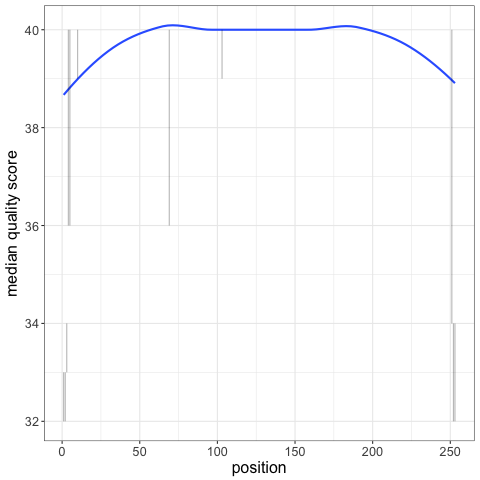

In [10]:
%%R
library("ggplot2")
testqual = read.csv("test.quality", sep='\t')
ggplot(testqual, aes(x=column, y=med, ymin=Q1, ymax=Q3)) + geom_smooth(se=FALSE) + geom_linerange(alpha=0.3) + labs(x='position', y='median quality score') + theme_bw() + theme( text = element_text(size=16) ) 

In [11]:
!usearch9

usearch v9.2.64_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-16 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

License: twhitman@wisc.edu



In [1]:
%%bash
# Using "bash magic" - to run bash code in iPython notebook

Seqs=../data/Seq_data/MergedSeqs/*.assembled.fastq
Seqs=($Seqs)
# Setting array of merged sequence files

# For loop to run pear merge fwd and rev reads on all datasets.
# Most of this code just pulls out the sample's name for each pair of seqeunce files.
for ((i = 0; i < ${#Seqs[@]}; ++i)); do
    filepath=${Seqs[i]}
    # Take the full filepath for each sample (using read 1 arbitrarily)
    splitfilepath=(${filepath//\// })
    # Split it up by /s
    filename=${splitfilepath[${#splitfilepath[@]} - 1]}
    # Take the last element from that filepath (i.e., the filename for read 1)
    splitfilename=(${filename//_/ })
    # Split the filename up using the underscore
    outputname=${splitfilename[$1]}
    # Take the first element of the split filename - i.e., everything before the first underscore - i.e., the sampleID
    usearch9 -fastq_filter "${Seqs[i]}" -fastaout ../data/Seq_data/MergedSeqs/$outputname.maxee1 -fastq_maxee 1
    # Removing sequences with more than 1 expected error using usearch
done

usearch v9.2.64_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-16 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

License: twhitman@wisc.edu

usearch v9.2.64_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-16 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

License: twhitman@wisc.edu

usearch v9.2.64_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-16 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

License: twhitman@wisc.edu

usearch v9.2.64_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-16 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

License: twhitman@wisc.edu

usearch v9.2.64_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-16 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

License: twhitman@wisc.edu

usearch v9.2.64_i86osx32, 4.0Gb RAM (17.2Gb total), 4 cores
(C) Copyright 2013-16 Robert C. Edgar, all rights reserved.
http:

00:01 2.0Mb   100.0% Filtering, 99.9% passed
     30583  Reads (30.6k)                   
        27  Discarded reads with expected errs > 1.00
     30556  Filtered reads (30.6k, 99.9%)
00:02 1.9Mb   100.0% Filtering, 99.9% passed
     78961  Reads (79.0k)                   
        85  Discarded reads with expected errs > 1.00
     78876  Filtered reads (78.9k, 99.9%)
00:01 2.0Mb   100.0% Filtering, 99.9% passed
     10230  Reads (10.2k)                   
        10  Discarded reads with expected errs > 1.00
     10220  Filtered reads (10.2k, 99.9%)
00:00 1.9Mb   100.0% Filtering, 99.9% passed
     22527  Reads (22.5k)                   
        17  Discarded reads with expected errs > 1.00
     22510  Filtered reads (22.5k, 99.9%)
00:01 1.9Mb   100.0% Filtering, 99.9% passed
     31175  Reads (31.2k)                   
        26  Discarded reads with expected errs > 1.00
     31149  Filtered reads (31.1k, 99.9%)
00:01 1.9Mb   100.0% Filtering, 100.0% passed
     27241  Reads (27.2k

In [32]:
%%bash
# Using "bash magic" - to run bash code in iPython notebook

Seqs=../data/Seq_data/MergedSeqs/*maxee1*
Seqs=($Seqs)
# Setting array of merged and error-filtered files

# For loop to run pear merge fwd and rev reads on all datasets.
# Most of this code just pulls out the sample's name for each pair of seqeunce files.
for ((i = 0; i < ${#Seqs[@]}; ++i)); do
    filepath=${Seqs[i]}
    # Take the full filepath for each sample (using read 1 arbitrarily)
    splitfilepath=(${filepath//\// })
    # Split it up by /s
    filename=${splitfilepath[${#splitfilepath[@]} - 1]}
    # Take the last element from that filepath (i.e., the filename for read 1)
    splitfilename=(${filename//_/ })
    # Split the filename up using the underscore
    outputname=${splitfilename[$1]}
    # Take the first element of the split filename - i.e., everything before the first underscore - i.e., the sampleID
    bioawk -c fastx '{if ($seq !~ /N/){print ">" $name " " $4 "\n" $seq}}' ${Seqs[i]} > ../data/Seq_data/MergedSeqs/$outputname.noN.fasta
    # Copying only the sequences that contain no N characters
    printf "Number of sequence pre-filter: "
    grep -c ">" ${Seqs[i]}
    printf "Number of sequences post-filter: "
    grep -c ">" ../data/Seq_data/MergedSeqs/$outputname.noN.fasta
    # Evaluate and report the number of sequences (indicated by >) in each filtered fasta file
done
#  Basically there weren't really many / any Ns

Number of sequence pre-filter: 30556
Number of sequences post-filter: 30556
Number of sequence pre-filter: 30556
Number of sequences post-filter: 30556
Number of sequence pre-filter: 78876
Number of sequences post-filter: 78876
Number of sequence pre-filter: 78876
Number of sequences post-filter: 78876
Number of sequence pre-filter: 10220
Number of sequences post-filter: 10220
Number of sequence pre-filter: 10220
Number of sequences post-filter: 10220
Number of sequence pre-filter: 22510
Number of sequences post-filter: 22510
Number of sequence pre-filter: 22510
Number of sequences post-filter: 22510
Number of sequence pre-filter: 31149
Number of sequences post-filter: 31149
Number of sequence pre-filter: 31149
Number of sequences post-filter: 31149
Number of sequence pre-filter: 27229
Number of sequences post-filter: 27229
Number of sequence pre-filter: 27229
Number of sequences post-filter: 27229
Number of sequence pre-filter: 29054
Number of sequences post-filter: 29054
Number of se

In [35]:
!mkdir ../data/Seq_data/QCSeqs

In [36]:
!cat ../data/Seq_data/MergedSeqs/*.assembled.fastq.maxee1.noN.fasta > ../data/Seq_data/QCSeqs/QCseqs.fasta
# make one giant file with all our sequences

In [37]:
! grep -c ">" ../data/Seq_data/QCSeqs/QCseqs.fasta
# Count total QC'd sequences so far (6.5M)

6550268


### Using mothur for more filter and alignmnent based QC

In [28]:
!sed -e 's/ /_/g' ../data/Seq_data/QCSeqs/QCseqs.fasta > ../data/Seq_data/QCSeqs/QCseqs.sed.fasta
# Keeping the whole samplename without spaces

In [29]:
!head ../data/Seq_data/QCSeqs/QCseqs.sed.fasta

>HWI-M04026:146:000000000-B58PG:1:1101:13055:1749_1:N:0:TGCTCGTAGATCGTGT
TACGTAGGGGGCAAGCGTTGTCCGGAATCATTGGGCGTAAAGAGCGTGTAGGCGGCCCGATAAGTCCGCTGTGAAAGTCCAGGGCTCAACTCTGGAATGCCGGTGGATACTGTCGGGCTCGAATCCGGAAGAGGTGAGTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAGGAACACCAATGGCGAAGGCAGCTCACTGGGACGGTATTGACGCTGAGACGCGAAAGCGTGGGGAGCAAACAGG
>HWI-M04026:146:000000000-B58PG:1:1101:17688:1769_1:N:0:TGCTCGTAGATCGTGT
TACGTAGGGTGCGAGCGTTGTCCGGAATTACTGGGCGTAAAGAGCTCGTAGGTGGTTTGTCGCGTTGTTCGTGAAAACCGGAGGCTCAACCTCTGGCGTGCGGGCGATACGGGCAGACTTGAGTACTGCAGGGGAGACTGGAATTCCTGGTGTAGCGGTGGAATGCGCAGATATCAGGAGGAACACCGGTGGCGAAGGCGGGTCTCTGGGCAGTAACTGACGCTGAGGAGCGAAAGCGTGGGGAGCGAACAGG
>HWI-M04026:146:000000000-B58PG:1:1101:19384:1834_1:N:0:TGCTCGTAGATCGTGT
TACGTAGGGCGCAAGCGTTATCCGGAATTATTGGGCGTAAAGAGCTCGTAGGCGGTTTGTCGCGTCTGCCGTGAAAGTCCGGGGCTCAACTCCGGATCTGCGGTGGGTACGGGCAGACTAGAGTGATGTAGGGGAGACTGGAATTCCTGGTGTAGCGGTGAAATGCGCAGATATCAGGAGGAACACCGGTGGCGAAGGCGGGTCTCTGGGCCGATACTGACGCTGAGGAGCGAAAGCGTGGGGAGCGAACAGG
>HWI-M04026:146:000

In [5]:
%%mothur
help()

mothur > help()
For more information about a specific command type 'commandName(help)' i.e. 'cluster(help)'

For further assistance please refer to the Mothur manual on our wiki at http://www.mothur.org/wiki, or contact Pat Schloss at mothur.bugs@gmail.com.

mothur > quit()


May need to run this outside of notebook...

echo $PATH

export PATH=$PATH:/opt/virt_env/bin/mothur

Just check out the sequences

In [30]:
%%mothur
summary.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.fasta)

mothur > summary.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.fasta)

Using 1 processors.

Start	End	NBases	Ambigs	Polymer	NumSeqs
Minimum:	1	54	54	0	3	1
2.5%-tile:	1	253	253	0	4	163757
25%-tile:	1	253	253	0	4	1637568
Median: 	1	253	253	0	5	3275135
75%-tile:	1	253	253	0	5	4912702
97.5%-tile:	1	254	254	0	6	6386512
Maximum:	1	427	427	0	21	6550268
Mean:	1	252.848	252.848	0	4.67561
# of Seqs:	6550268

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.sed.summary

It took 168 secs to summarize 6550268 sequences.
[WARNING]: your sequence names contained ':'.  I changed them to '_' to avoid problems in your downstream analysis.

mothur > quit()


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Detected 1 [WARNING] messages, please review.
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


Getting only the unique sequences to work with next, for efficiency

In [12]:
%%mothur
unique.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.fasta)

mothur > unique.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.fasta)
6550268	1838561

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.sed.names
../data/Seq_data/QCSeqs/QCseqs.sed.unique.fasta

[WARNING]: your sequence names contained ':'.  I changed them to '_' to avoid problems in your downstream analysis.

mothur > quit()


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Detected 1 [WARNING] messages, please review.
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


6.55M total sequences; 1.8M unique sequences.

Next, aligning sequences based on filtered silva database (db created by trimming with our primers)

Note: the alignment step takes a while (10s of minutes on my laptop)

#### Creating the database for alignment

In [33]:
%%mothur
pcr.seqs(fasta=silva.total.filter.fasta, oligos=oligos.txt, processors=4)

mothur > pcr.seqs(fasta=silva.total.filter.fasta, oligos=oligos.txt, processors=4)

Using 4 processors.

Output File Names:
silva.total.filter.pcr.fasta
silva.total.filter.bad.accnos
silva.total.filter.scrap.pcr.fasta


It took 24 secs to screen 18491 sequences.

mothur > quit()


In [34]:
%%mothur
summary.seqs(fasta=silva.total.filter.pcr.fasta)

mothur > summary.seqs(fasta=silva.total.filter.pcr.fasta)

Using 1 processors.

Start	End	NBases	Ambigs	Polymer	NumSeqs
Minimum:	4186	7013	230	0	3	1
2.5%-tile:	4187	7013	252	0	4	393
25%-tile:	4187	7013	253	0	4	3922
Median: 	4187	7013	253	0	4	7844
75%-tile:	4187	7013	253	0	5	11766
97.5%-tile:	4187	7013	254	1	6	15295
Maximum:	4193	7060	1017	5	9	15687
Mean:	4187	7013	253.095	0.047619	4.59788
# of Seqs:	15687

Output File Names:
silva.total.filter.pcr.summary

It took 8 secs to summarize 15687 sequences.

mothur > quit()


Looks pretty good - we got some very long sequences

In [35]:
%%mothur
screen.seqs(fasta=silva.total.filter.pcr.fasta, start=4186, end=7013, processors=4)

mothur > screen.seqs(fasta=silva.total.filter.pcr.fasta, start=4186, end=7013, processors=4)

Using 4 processors.

Output File Names:
silva.total.filter.pcr.good.fasta
silva.total.filter.pcr.bad.accnos


It took 4 secs to screen 15687 sequences.

mothur > quit()


In [36]:
%%mothur
summary.seqs(fasta=silva.total.filter.pcr.good.fasta)

mothur > summary.seqs(fasta=silva.total.filter.pcr.good.fasta)

Using 1 processors.

Start	End	NBases	Ambigs	Polymer	NumSeqs
Minimum:	4186	7013	253	0	4	1
2.5%-tile:	4186	7013	253	0	4	1
25%-tile:	4186	7013	253	0	4	1
Median: 	4186	7013	254	0	4	2
75%-tile:	4186	7013	255	0	5	3
97.5%-tile:	4186	7013	253	0	4	3
Maximum:	4186	7013	255	0	5	3
Mean:	4186	7013	254	0	4.33333
# of Seqs:	3

Output File Names:
silva.total.filter.pcr.good.summary

It took 0 secs to summarize 3 sequences.

mothur > quit()


In [39]:
!mv silva.total.filter.pcr.good.fasta silva.db.fasta
#Renaming the database file

In [43]:
!head -10000 ../data/Seq_data/QCSeqs/QCseqs.sed.unique.fasta > test.fasta

Testing seconds to align 5000 seqs with diff ksize
ksize=5 6,5,6,7
ksize=6 5,4,4,4
ksize=7 4,4,4,4
ksize=8 5,4,4,5

In [64]:
%%mothur
align.seqs(candidate=../data/Seq_data/QCSeqs/QCseqs.sed.unique.fasta, template=silva.db.fasta, processors=4, flip=T, ksize=7)

mothur > align.seqs(candidate=../data/Seq_data/QCSeqs/QCseqs.sed.unique.fasta, template=silva.db.fasta, processors=4, flip=T, ksize=7)

Using 4 processors.

Reading in the silva.db.fasta template sequences...	DONE.
It took 0 to read  3 sequences.
Aligning sequences from ../data/Seq_data/QCSeqs/QCseqs.sed.unique.fasta ...
[WARNING]: Some of your sequences generated alignments that eliminated too many bases, a list is provided in ../data/Seq_data/QCSeqs/QCseqs.sed.unique.flip.accnos. If the reverse compliment proved to be better it was reported.
It took 2459 secs to align 1838561 sequences.


Output File Names:
../data/Seq_data/QCSeqs/QCseqs.sed.unique.align
../data/Seq_data/QCSeqs/QCseqs.sed.unique.align.report
../data/Seq_data/QCSeqs/QCseqs.sed.unique.flip.accnos


mothur > quit()


<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<^>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Detected 1 [WARNING] me

In [65]:
!grep -c ">" ../data/Seq_data/QCSeqs/QCseqs.sed.unique.align
!grep -c "HWI" ../data/Seq_data/QCSeqs/QCseqs.sed.unique.flip.accnos
# Seems like we lost a lot of unique sequences.
# I.e., 1.8M to 0.2M... Yes, could be lots of sequence errors...
# But might be worth re-running alignment step with re-filtered database.
# For now...

260546
945


In [4]:
# We lost quite a few seqs.. blast a few sequences from the ../data/Seq_data/QCSeqs/QCseqs.sed.unique.flip.accnos file
# !grep -A "1107:21149:28053_1:N:0:TGCTCGTAGATCGTGT" ../data/Seq_data/QCSeqs/QCseqs.sed.fasta
    # Mitochondrial
!grep -A 1 "1105:16908:4966_1:N:0:TGCTCGTAGATCGTGT" ../data/Seq_data/QCSeqs/QCseqs.sed.fasta
    

>HWI-M04026:146:000000000-B58PG:1:1105:16908:4966_1:N:0:TGCTCGTAGATCGTGT
TACATGAAAGACTAGTGTTATTCATCTTTAATAGGTTTAAAGGGTACCTAGACAGTAAGTATAGCCTAAAAAAGGAACATATTTACTAGAGTTTTATTAGAGAAGGTGGAATTTTTGGAGTAAAGATATAATTTGCTAAAACCAAAGAGACAGACAACGGTGAAGACAACCTTCTATCTATAAACTGACGTTGAGGGACGAAGGCTTGGGTAGCGATAAGG


In [68]:
%%mothur
summary.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.align, name=../data/Seq_data/QCSeqs/QCseqs.sed.names, processors=4)

mothur > summary.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.align, name=../data/Seq_data/QCSeqs/QCseqs.sed.names, processors=4)

Using 4 processors.

Start	End	NBases	Ambigs	Polymer	NumSeqs
Minimum:	629	3455	4	0	1	1
2.5%-tile:	4187	7013	253	0	4	82194
25%-tile:	4187	7013	253	0	4	821937
Median: 	4187	7013	253	0	4	1643873
75%-tile:	4187	7013	253	0	5	2465809
97.5%-tile:	4187	7013	254	0	6	3205551
Maximum:	7008	7013	266	0	11	3287744
Mean:	4189.84	7008.13	252.244	0	4.64514
# of unique seqs:	260546
total # of seqs:	3287744

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.sed.unique.summary

It took 48 secs to summarize 3287744 sequences.

mothur > quit()


In [3]:
%%mothur
screen.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.align, name=../data/Seq_data/QCSeqs/QCseqs.sed.names, minlength=250, maxlength=266, maxhomop=8, processors=4)

mothur > screen.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.align, name=../data/Seq_data/QCSeqs/QCseqs.sed.names, minlength=250, maxlength=266, maxhomop=8, processors=4)

Using 4 processors.
Your namefile does not include the sequence HWI-M04026_146_000000000-B58PG_1_1106_20951_21276_1_N_0_TAGCAGCTHWI-M04026_146_000000000-B58PG_1_1108_23344_22291_1_N_0_ACTACGACTACGAGAC please correct.
Your namefile does not include the sequence HWI-M04026_146_000000000-B58PG_1_1108 please correct.
Your namefile does not include the sequence HWI-M04026_146_000000000-B58PG_1_HWI-M04026_146_000000000-B58PG_1_1113_15555_24380_1_N_0_TCTCTATGTAGTGTAG please correct.

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.align
../data/Seq_data/QCSeqs/QCseqs.sed.unique.bad.accnos
../data/Seq_data/QCSeqs/QCseqs.sed.good.names


It took 163 secs to screen 260546 sequences.

mothur > quit()


In [4]:
!grep -c ">" ../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.align

112378


Then, filter the sequences so there are no gaps in the alignment

In [5]:
%%mothur
filter.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.align, vertical=T, processors=4)

mothur > filter.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.align, vertical=T, processors=4)

Using 4 processors.
Creating Filter...
[ERROR]: Sequences are not all the same length, please correct.
[ERROR]: Sequences are not all the same length, please correct.
[ERROR]: Sequences are not all the same length, please correct.


Running Filter...



Length of filtered alignment: 11616
Number of columns removed: 0
Length of the original alignment: 11616
Number of sequences used to construct filter: 112378

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.filter
../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.fasta


mothur > quit()


And summarize them:

In [8]:
%%mothur
summary.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.fasta, name=../data/Seq_data/QCSeqs/QCseqs.sed.names, processors=4)

mothur > summary.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.fasta, name=../data/Seq_data/QCSeqs/QCseqs.sed.good.names, processors=4)

Using 4 processors.

Start	End	NBases	Ambigs	Polymer	NumSeqs
Minimum:	984	3810	250	0	3	1
2.5%-tile:	4187	7013	253	0	4	51245
25%-tile:	4187	7013	253	0	4	512442
Median: 	4187	7013	253	0	4	1024883
75%-tile:	4187	7013	253	0	5	1537324
97.5%-tile:	4187	7013	254	0	6	1998521
Maximum:	4194	7013	260	0	8	2049765
Mean:	4187	7013	253.034	0	4.63232
# of unique seqs:	29442
total # of seqs:	2049765

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.summary

It took 15 secs to summarize 2049765 sequences.

mothur > quit()


In this step, we will remove any sequences containing homopolymers with a length greater than 8, and any sequences that do not lie in our amplicon region.

In the previous step, the median 'start' and 'end' positions will be used to trim off any sequences that do not lie in our amplicon region. Every time you run this step, you must adjust the values in the following code to match these for your specific dataset.

In [7]:
%%mothur
screen.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.fasta, name=../data/Seq_data/QCSeqs/QCseqs.sed.good.names, end=7000, processors=4)

mothur > screen.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.fasta, name=../data/Seq_data/QCSeqs/QCseqs.sed.good.names, end=7000, processors=4)

Using 4 processors.

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.fasta
../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.bad.accnos
../data/Seq_data/QCSeqs/QCseqs.sed.good.good.names


It took 32 secs to screen 29442 sequences.

mothur > quit()


In [9]:
%%mothur
summary.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.fasta, name=../data/Seq_data/QCSeqs/QCseqs.sed.names, processors=4)

mothur > summary.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.fasta, name=../data/Seq_data/QCSeqs/QCseqs.sed.good.good.names, processors=4)

Using 4 processors.

Start	End	NBases	Ambigs	Polymer	NumSeqs
Minimum:	4187	7009	250	0	3	1
2.5%-tile:	4187	7013	253	0	4	51245
25%-tile:	4187	7013	253	0	4	512441
Median: 	4187	7013	253	0	4	1024881
75%-tile:	4187	7013	253	0	5	1537321
97.5%-tile:	4187	7013	254	0	6	1998517
Maximum:	4194	7013	260	0	8	2049761
Mean:	4187	7013	253.034	0	4.63232
# of unique seqs:	29440
total # of seqs:	2049761

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.summary

It took 15 secs to summarize 2049761 sequences.

mothur > quit()


Erring for now on the side of less trimming

In [10]:
%%bash
printf "Number of sequences post-filter: "
grep -c ">" ../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.fasta

Number of sequences post-filter: 29440


Filter the sequences again to remove any new gaps

In [11]:
%%mothur
filter.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.fasta, vertical=T, trump=., processors=4)

mothur > filter.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.fasta, vertical=T, trump=., processors=4)

Using 4 processors.
Creating Filter...
[ERROR]: Sequences are not all the same length, please correct.
[ERROR]: Sequences are not all the same length, please correct.


Running Filter...



Length of filtered alignment: 2816
Number of columns removed: 8800
Length of the original alignment: 11616
Number of sequences used to construct filter: 29440

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.filter
../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.filter.fasta


mothur > quit()


Summarize them one more time

In [12]:
%%mothur
summary.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.filter.fasta, name=../data/Seq_data/QCSeqs/QCseqs.sed.names, processors=4)

mothur > summary.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.filter.fasta, name=../data/Seq_data/QCSeqs/QCseqs.sed.good.good.names, processors=4)

Using 4 processors.

Start	End	NBases	Ambigs	Polymer	NumSeqs
Minimum:	1	2816	246	0	3	1
2.5%-tile:	1	2816	249	0	4	51245
25%-tile:	1	2816	249	0	4	512441
Median: 	1	2816	249	0	4	1024881
75%-tile:	1	2816	249	0	5	1537321
97.5%-tile:	1	2816	250	0	6	1998517
Maximum:	1	2816	256	0	8	2049761
Mean:	1	2816	249.034	0	4.63229
# of unique seqs:	29440
total # of seqs:	2049761

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.filter.summary

It took 14 secs to summarize 2049761 sequences.

mothur > quit()


In [13]:
%%mothur
deunique.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.filter.fasta, name=../data/Seq_data/QCSeqs/QCseqs.sed.names)

mothur > deunique.seqs(fasta=../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.filter.fasta, name=../data/Seq_data/QCSeqs/QCseqs.sed.names)

Output File Names:
../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.filter.redundant.fasta


mothur > quit()


And we just have to take out all the alignment characters:

In [16]:
nprocs=4
!sed '/>/! s/-//g;/>/! s/\.//g' ../data/Seq_data/QCSeqs/QCseqs.sed.unique.good.filter.good.filter.redundant.fasta > ../data/Seq_data/QCSeqs/16S_QC.fasta

One last summary:

In [17]:
%%mothur
summary.seqs(fasta=../data/Seq_data/QCSeqs/16S_QC.fasta, processors=4)

mothur > summary.seqs(fasta=../data/Seq_data/QCSeqs/16S_QC.fasta, processors=4)

Using 4 processors.

Start	End	NBases	Ambigs	Polymer	NumSeqs
Minimum:	1	116	116	0	3	1
2.5%-tile:	1	249	249	0	4	34497
25%-tile:	1	249	249	0	4	344967
Median: 	1	249	249	0	4	689934
75%-tile:	1	249	249	0	5	1034901
97.5%-tile:	1	250	250	0	6	1345371
Maximum:	1	251	251	0	8	1379867
Mean:	1	249.023	249.023	0	4.63081
# of Seqs:	1379867

Output File Names:
../data/Seq_data/QCSeqs/16S_QC.summary

It took 15 secs to summarize 1379867 sequences.

mothur > quit()


These reductions are similar to those we saw for the mineral project - 8.x M seqs >> 1.x M seqs

So, seems in line with previous labs' sequencing. Less than PyOM project, though - ended up with 8M seqs, but that was 2x300PE